# Tips data-set

Workings that comes with the Seaborn Tips data-set.

## Relating variables with scatter plots. 
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [5]:
# Import various Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


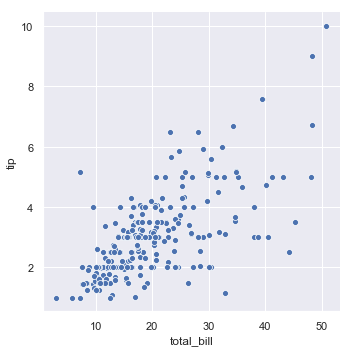

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

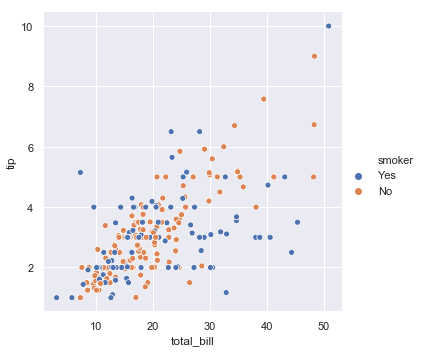

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

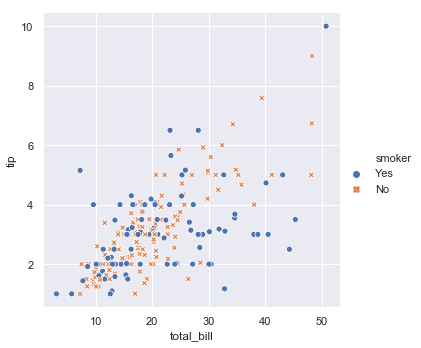

In [11]:
# Total bill and whether or not the customer smoked.
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

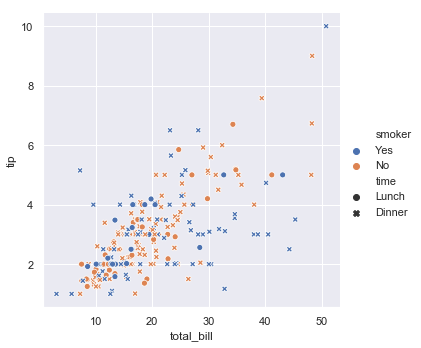

In [10]:
# Helps us distinguish between, total bill, somkers, non-smokers, and serving times.
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

Next we can look at the size of the dinner parties. 

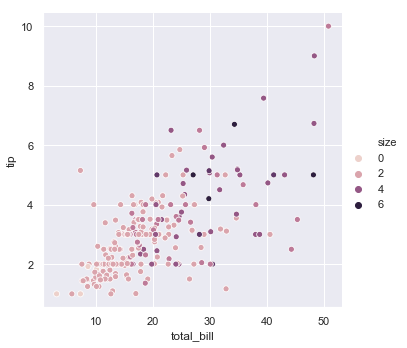

In [12]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

# Emphasizing continuity with line plots
Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line"

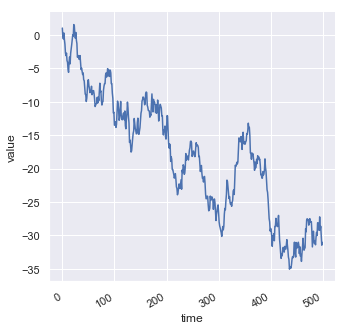

In [13]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

# Aggregation and representing uncertainty¶
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

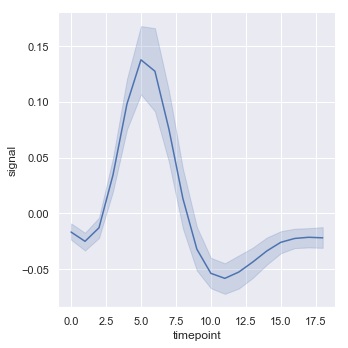

In [15]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

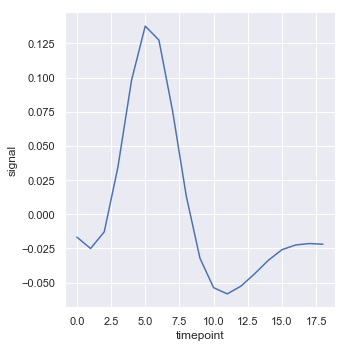

In [16]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

# Showing multiple relationships with facets¶
We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

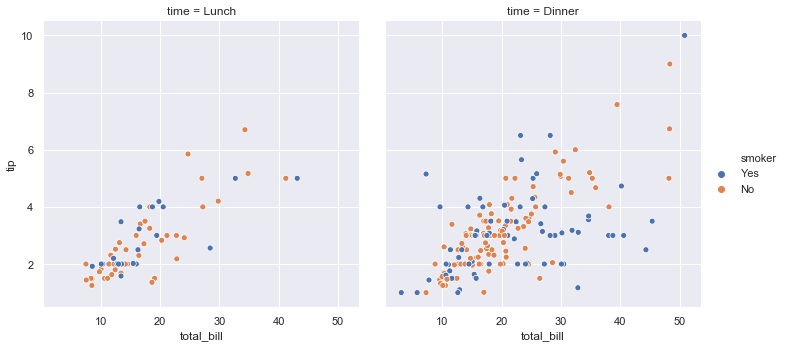

In [17]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);